# Part 5: Calculate Mandelbrot Set parallelized

In [1]:
# NumPy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

In [2]:
%%writefile mandelbrot_numpy.py
import numpy as np

def mandelbrot_numpy(x, y):
    c = x + y*1j
    fractal = np.full(c.shape, 20, dtype=np.int8)
    z = c
    for i in range(20):
        z = z**2 + c                                 # applying z → z² + c
        diverged = z.real**2 + z.imag**2 > 4         # |z| > 2 is "divergence"
        diverging_now = diverged & (fractal == 20)   # some are already done
        fractal[diverging_now] = i                   # just set the new ones
        z[diverged] = 2                              # clamp diverged at 2
    return fractal

Overwriting mandelbrot_numpy.py


In [3]:
from mandelbrot_numpy import mandelbrot_numpy

width, height = 8_000, 8_000
y, x = np.ogrid[-1:0:height*1j, -1.5:0:width*1j]

# calculate the mandelbrot set
mandelbrot_set = mandelbrot_numpy(x, y)

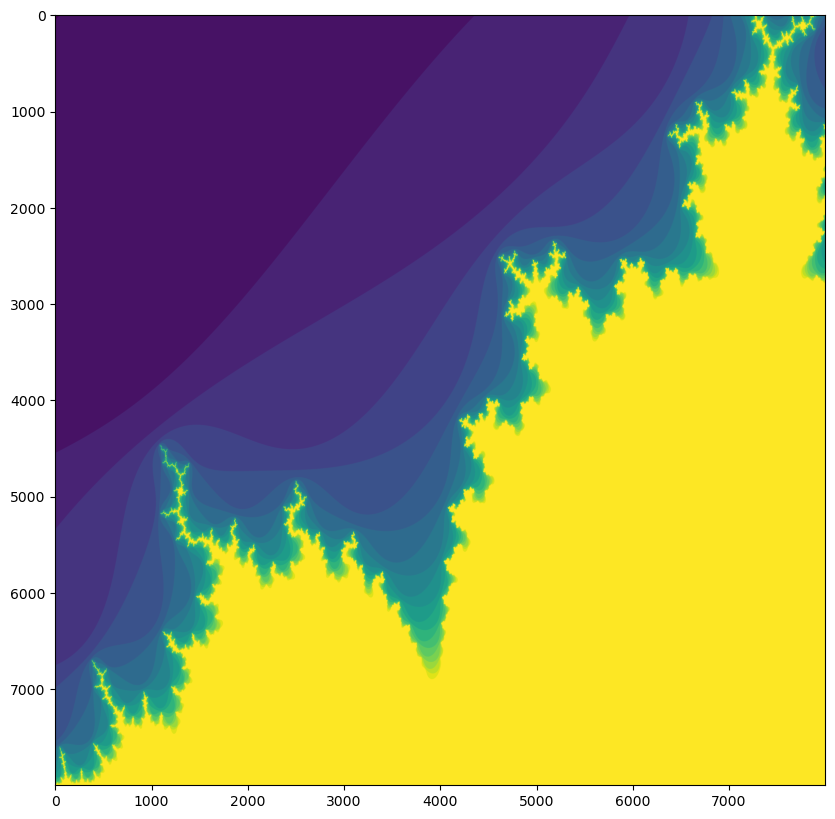

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(mandelbrot_set)

That works, but takes already ~5s... uh oh, that's too long and does not scale!

## Task: Try using parallelization methods to run this faster!

Parallelize the mandelbrot set image calculation using:
- multi-threading
- multi-processing
- Dask

---

_Do not click us unless you're stuck!_

<details>
<summary>Tip</summary>

### Chunk the 2d image into smaller patches that can run in parallel 

![image](img/mandelbrot_2d_patches.png)
</details>

<details>
<summary>Exemplary tip code snippet</summary>

### Exemplary 2D chunking implementation

```python
import numpy as np
from mandelbrot_numpy import mandelbrot_numpy


width, height = 8_000, 8_000
y, x = np.ogrid[-1:0:height*1j, -1.5:0:width*1j]

# chunk along x and y in slices of 2_000
chunk_size = 2_000
xs = [x[:, i*chunk_size:(i+1)*chunk_size] for i in range(x.size//chunk_size)]
ys = [y[i*chunk_size:(i+1)*chunk_size, :] for i in range(y.size//chunk_size)]

# assemble a list of chunks (or 'patches') of the full image
patches = []
for i, x_chunk in enumerate(xs):
    for j, y_chunk in enumerate(ys):
        patches.append((x_chunk, y_chunk, (i, j)))


# calculate the mandelbrot set of each patch (unparallelized)
for x, y, _ in patches:
    print(mandelbrot_numpy(x, y))

# your task: parallelize this loop using multi-threading, multi-processing, and/or Dask
# ...
```
</details>

In [5]:
# your implementation here...